In [9]:
#ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from datetime import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [10]:
#データと取り込み
df = pd.read_csv('ele.csv',engine='python')
df.columns = ['DATE','TIME','WAT','DEGREE']

In [11]:
da = []
for x in df['DATE']:
    da.append(dt.strptime(x, '%Y/%m/%d'))
df['DATE'] = da

In [12]:
yobi = ["月","火","水","木","金","土","日"]
df_yobi = []
for x in df['DATE']:
    df_yobi.append(yobi[x.weekday()])
df['YOBI'] = df_yobi

In [13]:
#説明変数を取得
tmpX = df.loc[:,['TIME','YOBI']]
y = df.loc[:,['WAT']]

In [14]:
le = []
enc_columns = np.array([])
for i in np.arange(0,2):
    le = np.append(le,LabelEncoder())
    le[i].fit(tmpX.iloc[:,i])
    enc_columns = np.append(enc_columns,le[i].classes_)
    tmpX.iloc[:,i] = le[i].transform(tmpX.iloc[:,i])

In [15]:
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(tmpX)
enc_data = one_hot_encoder.transform(tmpX).toarray() # numpyマトリックス型で返されるデータをnumpy.array型に変換
enc_df = pd.DataFrame(enc_data)
enc_df.columns = enc_columns

In [17]:
enc_columns

array(['0:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00',
       '16:00', '17:00', '18:00', '19:00', '1:00', '20:00', '21:00',
       '22:00', '23:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00',
       '8:00', '9:00', '土', '日', '月', '木', '水', '火', '金'], dtype=object)

In [18]:
#すべて数値データのため標準化を行う
#sc = StandardScaler()
#sc.fit(tmpX)
#X = pd.DataFrame(sc.transform(tmpX))
X = pd.concat([df.loc[:,['DEGREE']],enc_df], axis=1)

#学習用データとテストデータに分割
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.5)

In [20]:
#ランダムフォレスト
#モデル作成
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)
regr.fit(X_train,y_train)
#regr.coef_
train_pred = regr.predict(X_train)
train_mse = mean_squared_error(y_true=y_train , y_pred=train_pred)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [21]:
#RMSEを出力
print(np.sqrt(train_mse))

344.0258540925041


In [22]:
#テストデータで予測を実施
test_pred = regr.predict(X_test)
test_mse = mean_squared_error(y_true=y_test , y_pred=test_pred)
#RMSEを出力
print(np.sqrt(test_mse))

352.6621956651404


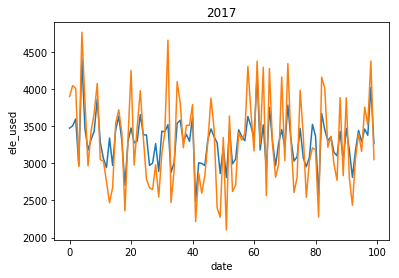

In [33]:
#読み込んだ電力データの表示
pyplot.plot(np.arange(100),test_pred[:100],label='pred')
pyplot.plot(np.arange(100),y_test[:100],label='k')
pyplot.title('2017')
pyplot.xlabel('date')
pyplot.ylabel('ele_used')
pyplot.show()

In [26]:
test_pred[:10]

array([3473.1387799 , 3503.13192145, 3596.84369201, 2968.00980359,
       4404.95923898, 3466.8396607 , 3178.83023756, 3320.40300919,
       3430.59816383, 3864.93715485])

In [30]:
y_test

,WAT
7766,3899
8417,4046
1575,4007
7917,2958
5266,4763
6177,3837
5867,2966
1643,3434
2032,3673
5705,4074
